# Descarga de históricos de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Entonces, en la clase anterior vimos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> Estas medidas se pueden calcular cuando tenemos escenarios probables de la economía y conocemos sus probabilidades de ocurrencia. Ahora, si no conocemos dichos escenarios, ¿qué podemos hacer?

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.csv`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 a hoy y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [1]:
# Importamos pandas
import pandas as pd

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [3]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [4]:
# Cargamos hoja de calculo en un dataframe
AAPL = pd.read_csv('precios/AAPL.csv')
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,111.389999,111.440002,107.349998,109.330002,99.945885,53204600
1,2015-01-05,108.290001,108.650002,105.410004,106.250000,97.130241,64285500
2,2015-01-06,106.540001,107.430000,104.629997,106.260002,97.139420,65797100
3,2015-01-07,107.199997,108.199997,106.699997,107.750000,98.501518,40105900
4,2015-01-08,109.230003,112.150002,108.699997,111.889999,102.286186,59364500


#### Anotación #1
- Quisieramos indizar por fecha.

In [5]:
# Cargamos hoja de calculo en un dataframe
AAPL = pd.read_csv('precios/AAPL.csv', index_col='Date')

In [6]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,99.945885,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.130241,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.139420,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.501518,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,102.286186,59364500


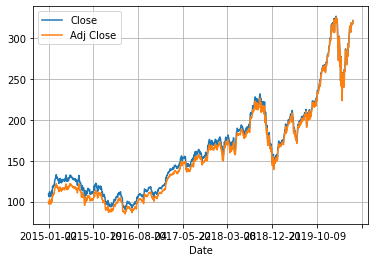

In [8]:
# Graficar precios de cierre y precios de cierre ajustados
AAPL[['Close', 'Adj Close']].plot(grid=True, figsize=(6, 4));

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [10]:
# Cargamos hoja de calculo en un dataframe
AAPL = pd.read_csv('precios/AAPL.csv', 
                   index_col='Date',
                   usecols=['Date', 'Adj Close'])

In [11]:
AAPL.head()

,Adj Close
Date,
2015-01-02,99.945885
2015-01-05,97.130241
2015-01-06,97.139420
2015-01-07,98.501518
2015-01-08,102.286186


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL.MX, AMZN.MX,GFNORTEO.MX,GFINBURO.MX) y contengan los datos de precio de cierre.

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [12]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas_datareader.data as web

/home/intern/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [13]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: necesita registrarse para obtener un api key.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [16]:
# Ejemplo yahoo
AAPL = web.DataReader(name=['AAPL', 'MSFT'],
                      data_source='yahoo',
                      start='2015-01-01'
                     )
AAPL.head()

Attributes   Adj Close                  Close                   High  \
Symbols           AAPL       MSFT        AAPL       MSFT        AAPL   
Date                                                                   
2015-01-02   99.945885  41.748566  109.330002  46.759998  111.440002   
2015-01-05   97.130241  41.364658  106.250000  46.330002  108.650002   
2015-01-06   97.139420  40.757530  106.260002  45.650002  107.430000   
2015-01-07   98.501518  41.275364  107.750000  46.230000  108.199997   
2015-01-08  102.286186  42.489609  111.889999  47.590000  112.150002   

Attributes                    Low                   Open             \
Symbols          MSFT        AAPL       MSFT        AAPL       MSFT   
Date                                                                  
2015-01-02  47.419998  107.349998  46.540001  111.389999  46.660000   
2015-01-05  46.730000  105.410004  46.250000  108.290001  46.369999   
2015-01-06  46.750000  104.629997  45.540001  106.540001  46.380001   
2015-01-07  46.459999  106.699997  45.490002  107.199997  45.980000   
2015-01-08  47.750000  108.699997  46.720001  109.230003  46.750000   

Attributes      Volume              
Symbols           AAPL        MSFT  
Date                                
2015-01-02  53204600.0  27913900.0  
2015-01-05  64285500.0  39673900.0  
2015-01-06  65797100.0  36447900.0  
2015-01-07  40105900.0  29114100.0  
2015-01-08  59364500.0  29645200.0

Sin embargo no se pueden descargar varios a la vez. Intentémoslo hacer nosotros así sea de manera rudimentaria:

In [17]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

In [19]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
closes = get_adj_closes(tickers=['AAPL', 'MSFT', 'NVDA', '^GSPC'],
                        start_date='2015-01-01',
                       )
closes.head()

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,99.945885,41.748566,19.395155,2058.199951
2015-01-05,97.130241,41.364658,19.067572,2020.579956
2015-01-06,97.139420,40.757530,18.489475,2002.609985
2015-01-07,98.501518,41.275364,18.441298,2025.900024
2015-01-08,102.286186,42.489609,19.135012,2062.139893


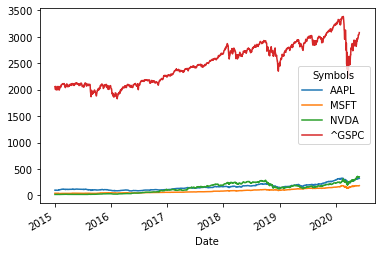

In [20]:
# Gráfico
closes.plot()

**Conclusión**
- Aprendimos a importar datos desde archivos locales.
- Aprendimos a importar datos remotamente con el paquete pandas_datareader.

¿Ahora qué? Pues con estos históricos, obtendremos los rendimientos y ellos nos servirán como base para caracterizar la distribución de rendimientos... 

### ¡Oh, si!

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>